In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import glob
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [5]:
!pip install opencv-python

In [6]:
image = cv2.imread('/kaggle/input/healthy-and-bleached-corals-image-classification/healthy_corals/1007788673_ced6bb5451_o.jpg',cv2.IMREAD_GRAYSCALE)

In [7]:
image.shape

(240, 300)

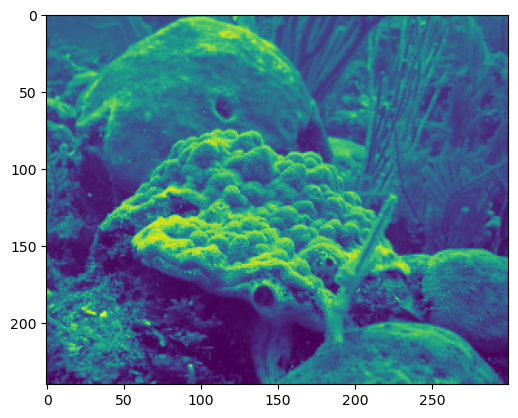

In [8]:
plt.imshow(image)

In [9]:
## import matplotlib.pyplot as plt
import glob
import librosa
import numpy as np
import cv2 
bleached_corals = glob.glob('/kaggle/input/healthy-and-bleached-corals-image-classification/bleached_corals/*.jpg')
healthy_corals = glob.glob('/kaggle/input/healthy-and-bleached-corals-image-classification/healthy_corals/*.jpg')

data = []
labels = []

image_size=(224,224)

for i in bleached_corals:   
    image = cv2.imread(i)
    # Resize the image
    image = cv2.resize(image, image_size)

    data.append(image)
    labels.append(0)

for i in healthy_corals:   
    image = cv2.imread(i)
    # Resize the image
    image = cv2.resize(image, image_size)

    data.append(image)
    labels.append(1)
    


    
X=np.array(data)
y=np.array(labels)
y.shape

(922,)

In [10]:
X.shape

(922, 224, 224, 3)

In [11]:
# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform train-validation split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [9]:
# Build the MLP model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
# Train the model
model.fit(X_train, y_train,validation_data=(X_val,y_val),epochs=10, batch_size=12)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")

# Make predictions on new images
predictions = model.predict(X_test[:10])
predicted_classes = np.argmax(predictions, axis=1)

# Print the predicted class and corresponding true class
for i in range(len(predicted_classes)):
    print(f"Predicted class: {predicted_classes[i]}, True class: {np.argmax(y_test[i])}")

Epoch 1/10
50/50 [==============================] - 5s 11ms/step - loss: 914.3235 - accuracy: 0.4788 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/10
50/50 [==============================] - 0s 6ms/step - loss: 0.6931 - accuracy: 0.5110 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/10
50/50 [==============================] - 0s 6ms/step - loss: 0.6930 - accuracy: 0.5246 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/10
50/50 [==============================] - 0s 6ms/step - loss: 0.6928 - accuracy: 0.5246 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/10
50/50 [==============================] - 0s 6ms/step - loss: 0.6927 - accuracy: 0.5246 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/10
50/50 [==============================] - 0s 6ms/step - loss: 0.6926 - accuracy: 0.5246 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 7/10
50/50 [==============================] - 0s 6ms/step - loss: 0.6925 - accuracy: 0.5246 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 8/10
50/50 

**Optimize the model to get at least 70% accuray .you may play with** 
1.   Dynamic learning rate
2.   Save model 
3.   Early stopping 
4.   Drop-Out** 
**for getting higher accuracy**


In [12]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Flatten

# Don't need a classifier layer !!

In [13]:
base_model = VGG16(input_shape=(224,224,3), include_top=True, weights='imagenet')
# include_top loads classifier part too
# include_top = False when we want to exclude prediction layer that has 'softmax' activation
for layer in base_model.layers:
    layer.trainable = False

553467096/553467096 [==============================] - 3s 0us/step


In [14]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [12]:
new_model=base_model.get_layer('fc2').output
# takes up to fc2 layer, can be used for another model

In [13]:
output=tf.keras.layers.Dense(units=1, activation='sigmoid')(new_model)

In [14]:
from tensorflow.keras.models import Model

In [15]:
model = Model(inputs=base_model.input, outputs=output)

In [43]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [16]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train,validation_data=(X_val,y_val),epochs=10, batch_size=12)



Epoch 1/10
50/50 [==============================] - 8s 60ms/step - loss: 0.7177 - accuracy: 0.6503 - val_loss: 0.6072 - val_accuracy: 0.7432
Epoch 2/10
50/50 [==============================] - 2s 45ms/step - loss: 0.5443 - accuracy: 0.7487 - val_loss: 0.5646 - val_accuracy: 0.7568
Epoch 3/10
50/50 [==============================] - 2s 39ms/step - loss: 0.3993 - accuracy: 0.8115 - val_loss: 0.5992 - val_accuracy: 0.7500
Epoch 4/10
50/50 [==============================] - 2s 39ms/step - loss: 0.3728 - accuracy: 0.8183 - val_loss: 0.5538 - val_accuracy: 0.7770
Epoch 5/10
50/50 [==============================] - 2s 44ms/step - loss: 0.2859 - accuracy: 0.8913 - val_loss: 0.4861 - val_accuracy: 0.7635
Epoch 6/10
50/50 [==============================] - 2s 39ms/step - loss: 0.2601 - accuracy: 0.8947 - val_loss: 0.5166 - val_accuracy: 0.7905
Epoch 7/10
50/50 [==============================] - 2s 39ms/step - loss: 0.2312 - accuracy: 0.9117 - val_loss: 0.4966 - val_accuracy: 0.7568
Epoch 8/10
50

In [17]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")



6/6 [==============================] - 4s 368ms/step - loss: 0.5477 - accuracy: 0.7892
Test loss: 0.5477
Test accuracy: 0.7892
1/1 [==============================] - 1s 973ms/step
Predicted class: 0, True class: 0
Predicted class: 0, True class: 0
Predicted class: 0, True class: 0
Predicted class: 0, True class: 0
Predicted class: 0, True class: 0
Predicted class: 0, True class: 0
Predicted class: 0, True class: 0
Predicted class: 0, True class: 0
Predicted class: 0, True class: 0
Predicted class: 0, True class: 0


# Need a classifier layer !!


In [15]:
base_model = VGG16(input_shape=(224,224,3), include_top=False, weights='imagenet')
for layer in base_model.layers:
    layer.trainable = False
base_model.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [16]:
model = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 64)                1605696   
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 16,320,449
Trainable params: 1,605,761
Non-trainable params: 14,714,688
_________________________________________________________________


In [20]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D, Flatten, Dense, Activation, Dropout, Add, Concatenate
from tensorflow.keras.models import Model

# Define the input shape
input_shape = (224, 224, 3)

# Define the input tensor
inputs = Input(shape=input_shape)

base_x = base_model(inputs)

# First Convolutional Block Branch 1
x = Conv2D(64, (7, 7), strides=(2, 2), padding='same',activation='relu')(base_x)
x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)

# Second Convolutional Block Branch 1
x = Conv2D(64, (3, 3), padding='same',activation='relu')(x)
x = Conv2D(64, (3, 3), padding='same',activation='relu')(x)


# First Convolutional Block Branch 1
y = Conv2D(64, (7, 7), strides=(2, 2), padding='same',activation='relu')(base_x)
y = MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='same')(y)

# Second Convolutional Block Branch 1
y = Conv2D(64, (3, 3), padding='same',activation='relu')(y)
y = Conv2D(64, (3, 3), padding='same',activation='relu')(y)


# Output layer concatenated
outputs = Concatenate()([x, y])

# Output layer flattened
outputs = Flatten()(outputs)

# Output layer fully connected
outputs = Dense(100, activation='softmax')(outputs)

# Create the model
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the summary of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16 (Functional)             (None, 7, 7, 512)    14714688    ['input_5[0][0]']                
                                                                                                  
 conv2d_6 (Conv2D)              (None, 4, 4, 64)     1605696     ['vgg16[2][0]']                  
                                                                                                  
 conv2d_9 (Conv2D)              (None, 4, 4, 64)     1605696     ['vgg16[2][0]']              

In [21]:
# Plot the model
tf.keras.utils.plot_model(
    model,
    to_file="ResNet34_02.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=1200,
    layer_range=None,
    show_layer_activations=True,
    show_trainable=False,
)

In [24]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
# Train the model
model.fit(X_train, y_train,validation_data=(X_val,y_val),epochs=10, batch_size=12)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")



Epoch 1/10
50/50 [==============================] - 4s 49ms/step - loss: 3.3674 - accuracy: 0.6112 - val_loss: 0.6202 - val_accuracy: 0.5338
Epoch 2/10
50/50 [==============================] - 2s 38ms/step - loss: 0.5139 - accuracy: 0.6859 - val_loss: 0.6259 - val_accuracy: 0.7568
Epoch 3/10
50/50 [==============================] - 2s 38ms/step - loss: 0.4132 - accuracy: 0.7929 - val_loss: 0.6352 - val_accuracy: 0.7095
Epoch 4/10
50/50 [==============================] - 2s 43ms/step - loss: 0.4051 - accuracy: 0.8081 - val_loss: 0.5433 - val_accuracy: 0.7635
Epoch 5/10
50/50 [==============================] - 2s 38ms/step - loss: 0.2394 - accuracy: 0.8727 - val_loss: 0.8253 - val_accuracy: 0.7703
Epoch 6/10
50/50 [==============================] - 2s 38ms/step - loss: 0.1748 - accuracy: 0.8998 - val_loss: 0.5675 - val_accuracy: 0.7568
Epoch 7/10
50/50 [==============================] - 2s 44ms/step - loss: 0.1180 - accuracy: 0.9304 - val_loss: 0.6962 - val_accuracy: 0.7905
Epoch 8/10
50

#  Is there any way to freeze some and train some 

**Make all layers trainable**

In [25]:
base_model = VGG16(input_shape=(224,224,3), include_top=True, weights='imagenet')
for layer in base_model.layers:
    layer.trainable = True

In [26]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [27]:
new_model=base_model.get_layer('fc2').output
output=tf.keras.layers.Dense(units=1, activation='sigmoid')(new_model)
model = Model(inputs=base_model.input, outputs=output)

In [28]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
# Train the model
model.fit(X_train, y_train,validation_data=(X_val,y_val),epochs=10, batch_size=12)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")


Epoch 1/10
50/50 [==============================] - 14s 122ms/step - loss: 2695.7898 - accuracy: 0.5042 - val_loss: 0.7730 - val_accuracy: 0.4865
Epoch 2/10
50/50 [==============================] - 6s 112ms/step - loss: 0.7439 - accuracy: 0.5161 - val_loss: 28.6294 - val_accuracy: 0.5000
Epoch 3/10
50/50 [==============================] - 5s 106ms/step - loss: 1.0138 - accuracy: 0.5008 - val_loss: 0.7205 - val_accuracy: 0.4932
Epoch 4/10
50/50 [==============================] - 5s 106ms/step - loss: 0.7121 - accuracy: 0.5331 - val_loss: 0.9700 - val_accuracy: 0.5000
Epoch 5/10
50/50 [==============================] - 5s 106ms/step - loss: 0.7475 - accuracy: 0.4958 - val_loss: 0.7067 - val_accuracy: 0.4662
Epoch 6/10
50/50 [==============================] - 5s 106ms/step - loss: 0.6958 - accuracy: 0.5467 - val_loss: 0.7039 - val_accuracy: 0.5203
Epoch 7/10
50/50 [==============================] - 6s 111ms/step - loss: 0.6949 - accuracy: 0.5314 - val_loss: 0.7246 - val_accuracy: 0.4730
E

In [52]:
base_model = VGG16(input_shape=(224,224,3), include_top=True, weights='imagenet')
for layer in base_model.layers:
    layer.trainable = False
for layer in base_model.layers[:-3]:
    layer.trainable = True

In [53]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

# Let's move to augmentation task


In [31]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Define the data augmentation generator
data_augmentation = ImageDataGenerator(
        rotation_range=10,
#         width_shift_range=0.1,
#         height_shift_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest'
)

# Compile the model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_callback = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# Get the unique classes and their frequencies
unique_classes, class_counts = np.unique(y_train, return_counts=True)

# Calculate the class weight for each unique class
total_samples = len(y_train)

class_weights = {}


for i, class_label in enumerate(unique_classes):
    class_weights[class_label] = class_counts[i] / total_samples
    
    
model.fit(data_augmentation.flow(X_train, y_train, batch_size=12),validation_data=(X_val,y_val),epochs=10,class_weight=class_weights,callbacks=[checkpoint_callback])

# Evaluate the model
model = tf.keras.models.load_model('best_model.h5')
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")


Epoch 1/10
50/50 [==============================] - 20s 291ms/step - loss: 0.4968 - accuracy: 0.5059 - val_loss: 0.7012 - val_accuracy: 0.5000
Epoch 2/10
50/50 [==============================] - 9s 166ms/step - loss: 0.3753 - accuracy: 0.5382 - val_loss: 0.7249 - val_accuracy: 0.5000
Epoch 3/10
50/50 [==============================] - 8s 159ms/step - loss: 0.3676 - accuracy: 0.4805 - val_loss: 0.7297 - val_accuracy: 0.5000
Epoch 4/10
50/50 [==============================] - 13s 259ms/step - loss: 0.3534 - accuracy: 0.4975 - val_loss: 0.6942 - val_accuracy: 0.5000
Epoch 5/10
50/50 [==============================] - ETA: 0s - loss: 0.3483 - accuracy: 0.5297

KeyboardInterrupt: 

# Load the mobileNetV2 and don't load the top .Use pretrained weights. Instead of Flatten use GlobalAverage Pooling. And do the classification task. Also save the best model and load and use that infer on test data. Also appropriately augment the data. Add confusion matrix and training curve

https://www.kaggle.com/datasets/sachinkumar413/alzheimer-mri-dataset

In [32]:
from tensorflow.keras.applications import MobileNetV2

base_model = MobileNetV2(input_shape=(224,224,3), include_top=False, weights='imagenet')
for layer in base_model.layers:
    layer.trainable = False
base_model.summary()

model = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])
# Compile the model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_callback = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)
# Train the model
# Train the model
model.fit(X_train, y_train,validation_data=(X_val,y_val),epochs=10, batch_size=12,callbacks=[checkpoint_callback])

# Evaluate the model
model = tf.keras.models.load_model('best_model.h5')
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")



9406464/9406464 [==============================] - 0s 0us/step
Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                

KeyboardInterrupt: 

In [33]:
def residual_block(f=64,k=3,s=1):
    if s==1:
        res=tf.keras.Sequential([tf.keras.layers.Conv2D(f,(k,k),padding='same'),
                         tf.keras.layers.Conv2D(f,(k,k),padding='same')
                        ])
    else:
        res=tf.keras.Sequential([tf.keras.layers.Conv2D(f,(k,k),strides=s,padding='same'),
                         tf.keras.layers.Conv2D(f,(k,k),padding='same')
                        ])
        
    return res

input_1=tf.keras.Input((224,224,3))
conv1=tf.keras.layers.Conv2D(64,(7,7),strides=2,padding="same")(input_1)
max1=tf.keras.layers.MaxPool2D((3,3),2,padding="same")(conv1)
x=max1
l=0
filters=[64,128,256,512]
for i in [3,4,6,3]:
    for j in range(i):
        if l==0: 
            res=residual_block(filters[l])(x)
            x=res+x
        elif l!=0 and j==0:
            res=residual_block(f=filters[l],s=2)(x)
            x=tf.keras.layers.Conv2D(filters[l],(1,1),strides=2,padding="same")(x)
            x=x+res
        elif l!=0 and j!=0:
            res=residual_block(filters[l])(x)
            x=res+x
    l=l+1
poolAvg=tf.keras.layers.GlobalAveragePooling2D()(x)
classifier=tf.keras.layers.Dense(1000)(poolAvg)
model=tf.keras.Model(input_1,classifier)
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 112, 112, 64  9472        ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 56, 56, 64)   0           ['conv2d[0][0]']                 
                                                                                              